In [1]:
import os
import data_loading
import models
from matplotlib import pyplot as plt
import tensorflow as tf

pos = os.path.join('./data', 'Parsed_Capuchinbird_Clips')
neg = os.path.join('./data', 'Parsed_Not_Capuchinbird_Clips')

train_ds, test_ds = data_loading.get_augmented_data(pos, neg)

single_sample_dimensions = train_ds.take(1).as_numpy_iterator().next()[0][0].shape
EPOCHS = 5

print(single_sample_dimensions)

2024-03-20 17:39:59.611178: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 17:39:59.614236: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 17:39:59.651582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 17:39:59.651626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 17:39:59.652923: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

(129, 374, 1)


Epoch 1/5
20/20 [==============================] - 39s 2s/step - loss: 0.5655 - binary_accuracy: 0.7437 - val_loss: 0.3009 - val_binary_accuracy: 0.9588
Epoch 2/5
20/20 [==============================] - 38s 2s/step - loss: 0.5207 - binary_accuracy: 0.7672 - val_loss: 0.3496 - val_binary_accuracy: 0.9176
Epoch 3/5
20/20 [==============================] - 39s 2s/step - loss: 0.2909 - binary_accuracy: 0.9203 - val_loss: 0.1694 - val_binary_accuracy: 0.9765
Epoch 4/5
20/20 [==============================] - 39s 2s/step - loss: 0.2819 - binary_accuracy: 0.9031 - val_loss: 0.1179 - val_binary_accuracy: 0.9765
Epoch 5/5
6/6 [==============================] - 14s 194ms/step - loss: 0.0908 - binary_accuracy: 0.9765
Accuracy: [0.09084603190422058, 0.9764705896377563]


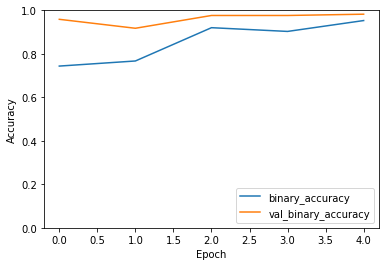

In [2]:
encoder = models.create_encoder(single_sample_dimensions)

classifier = models.create_classifier(encoder, single_sample_dimensions)

# Train the classifier with the encoder not frozen as a single model
history = classifier.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

# Print the accuracy of the model
accuracy = classifier.evaluate(test_ds)
print(f'Accuracy: {accuracy}')

# Plot the training and validation accuracy
plt.plot(history.history['binary_accuracy'], label = 'binary_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_binary_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Epoch 1/5
20/20 [==============================] - 39s 2s/step - loss: 3.4196 - val_loss: 3.3465
Epoch 2/5
20/20 [==============================] - 39s 2s/step - loss: 3.2811 - val_loss: 3.3345
Epoch 3/5
20/20 [==============================] - 39s 2s/step - loss: 3.1606 - val_loss: 3.3407
Epoch 4/5
20/20 [==============================] - 39s 2s/step - loss: 3.0995 - val_loss: 3.2560
Epoch 5/5
20/20 [==============================] - 39s 2s/step - loss: 3.0913 - val_loss: 3.2441
Epoch 1/5
20/20 [==============================] - 30s 1s/step - loss: 0.6741 - binary_accuracy: 0.5906 - val_loss: 0.5673 - val_binary_accuracy: 0.9941
Epoch 2/5
20/20 [==============================] - 30s 1s/step - loss: 0.5683 - binary_accuracy: 0.8516 - val_loss: 0.4958 - val_binary_accuracy: 0.9941
Epoch 3/5
20/20 [==============================] - 30s 1s/step - loss: 0.4873 - binary_accuracy: 0.9203 - val_loss: 0.4095 - val_binary_accuracy: 1.0000
Epoch 4/5
20/20 [==============================] - 30s 1

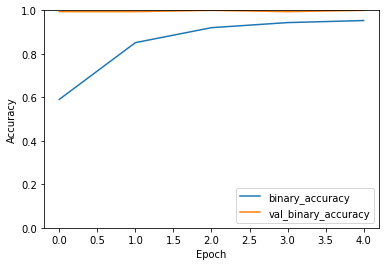

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

encoder = models.create_encoder(single_sample_dimensions)
encoder_with_projection_head = models.create_encoder_with_projection_head(
    encoder, single_sample_dimensions
)

# Train the encoder with the projection head
history = encoder_with_projection_head.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

# Train the classifier with the encoder frozen
encoder.trainable = False
classifier = models.create_classifier(encoder, single_sample_dimensions, trainable=False)

history2 = classifier.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

# Print the accuracy of the model
accuracy = classifier.evaluate(test_ds)
print(f'Accuracy: {accuracy}')

# Plot the accuracy of the model
plt.plot(history2.history['binary_accuracy'], label = 'binary_accuracy')
plt.plot(history2.history['val_binary_accuracy'], label = 'val_binary_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()